In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

NUM_WORDS = 10000

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=NUM_WORDS)

np.load = old
del(old)



In [2]:

word_index = reuters.get_word_index()
reverse_index = { value:key for key, value in word_index.items() }

def print_article(index):
    print(train_labels[index], " ".join([reverse_index.get(i - 3, "") for i in train_data[index]]))
    
for i in range(0, 5):
    print_article(i)



3    said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
4  generale de banque sa lt  br and lt heller overseas corp of chicago have each taken 50 pct stakes in  company sa  factors generale de banque said in a statement it gave no financial details of the transaction sa   turnover in 1986 was 17 5 billion belgian francs reuter 3
3  shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts ar

In [3]:
def vectorize_sequences(sequences, dimension=NUM_WORDS): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0 ## assigns 1 to multiple entries at once
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
x = set(train_labels)
len(x)

46

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(np.array(train_labels).astype("float32"))
y_test = to_categorical(np.array(test_labels).astype("float32"))

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(500, activation="relu", input_shape=(NUM_WORDS,)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))
model.summary()
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


W0729 15:12:55.045505 4515206592 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5000500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 46)                4646      
Total params: 5,055,246
Trainable params: 5,055,246
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5000500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
__________________________

In [7]:
x_train.shape
y_train.shape

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.01
)


Train on 8892 samples, validate on 90 samples
Epoch 1/20
8892/8892 [==============================] - 2s 203us/sample - loss: 1.8722 - acc: 0.5980 - val_loss: 1.2873 - val_acc: 0.7444
Epoch 2/20
8892/8892 [==============================] - 1s 165us/sample - loss: 0.8523 - acc: 0.8159 - val_loss: 1.0838 - val_acc: 0.7778
Epoch 3/20
8892/8892 [==============================] - 2s 197us/sample - loss: 0.5090 - acc: 0.8935 - val_loss: 0.9968 - val_acc: 0.8000
Epoch 4/20
8892/8892 [==============================] - 2s 195us/sample - loss: 0.3315 - acc: 0.9271 - val_loss: 1.0946 - val_acc: 0.8000
Epoch 5/20
8892/8892 [==============================] - 1s 168us/sample - loss: 0.2498 - acc: 0.9412 - val_loss: 1.0659 - val_acc: 0.7778
Epoch 6/20
8892/8892 [==============================] - 1s 159us/sample - loss: 0.1984 - acc: 0.9485 - val_loss: 1.1134 - val_acc: 0.7667
Epoch 7/20
8892/8892 [==============================] - 1s 159us/sample - loss: 0.1739 - acc: 0.9515 - val_loss: 1.2387 - val_

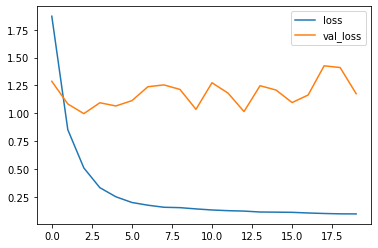

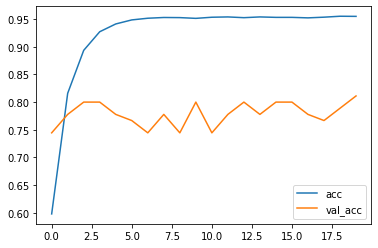

In [8]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.close()

In [9]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 126us/sample - loss: 1.2957 - acc: 0.7943


[1.2956961001653493, 0.794301]